
# Load the breast cancer data (don't forget to remove the id variable)
**While loading directly from sklearn id preoblem is already solved** 

Note: You will need to convert the class
variable y from categorical, B or M, to numbers like 0 or 1. You can use
LabelEncoder in sklearn.preprocessing to do that.

**Also already solved** 





In [0]:

import pandas as pd
from sklearn.datasets import load_breast_cancer


# Loading dataset to Pandas DataFrame and getting basic info about the data 

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


def display_data_info(data):
    
    display(data.info())
    display(data.head())

    print('Missing valuses columns:')
    display(data.columns[data.isnull().any()])
    
    print('Number of missing values:')
    display(data.apply(lambda x: x.isnull().sum( axis=0)))


# Checking validity of data - All OK 
display_data_info(X)
display(y.unique()) # data are already as 0 and 1





  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

None

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Missing valuses columns:


Index([], dtype='object')

Number of missing values:


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

array([0, 1])

#  Randomly split it into training and test subsets
(use 70% of the data for training and 30% for test). You can use the
train test split in sklearn to do that. Fixing the random state will
ensure you get the same splits every time you run your code.


#  Normalize the features to bring them on a similar scale.


In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Normalizing the data between 0 and 1 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns)

# Checking normalization
display(X.head(5))

# Splitting into test/train
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1234)  

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Create a logistic regression model that optimizes the cost/loss given by the sparse categorical crossentropy. Use the accuracy as the performance metric
The model should have
one layer, the output layer with one sigmoid unit, and should take as input
instances x representing samples from patients. Use a separate validation
set to tune the learning rate and the number of iterations. The valida-
tion set can be created when fitting the model, e.g. model.fit(X train,
y train, epochs=100, X val = 0.2). Experiment with 5 values for the
learning rates.

# Plot learning curves that show the variation of the loss and also variation of the accuracy metric with the number of iterations
for both training and validations sets, for the 5 values of the learning rate that you used.
# What learning rate gave the best results?
**For evaluating acccuracy of the model given learning rate a I choose minimum of the last acchieved score during fitting part. From my choice of LRs - the best score was achieved with LR set to 0.05 or 0.1. For the next testing, I choose 0.05**

# How many iterations are needed for convergence?
**From the graphs we can see, for higher lr the curve is not so smooth, because of the long jumps, but still all of them stops improving around 100th epoch (depending on the model).**

Model with lr of (0.1) (on validation data) has Accuracy of: 96.24999761581421%
Model with lr of (0.05) (on validation data) has Accuracy of: 94.9999988079071%
Model with lr of (0.01) (on validation data) has Accuracy of: 92.5000011920929%
Model with lr of (0.005) (on validation data) has Accuracy of: 91.25000238418579%
Model with lr of (0.001) (on validation data) has Accuracy of: 89.99999761581421%


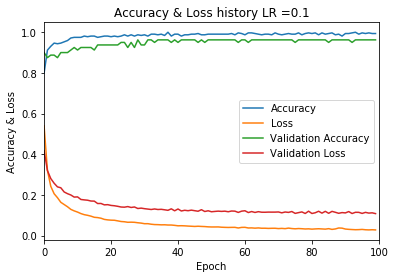

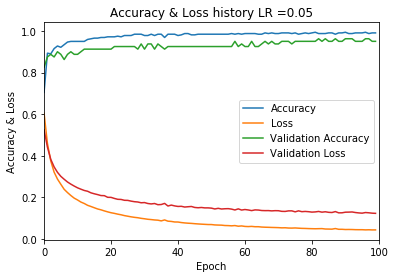

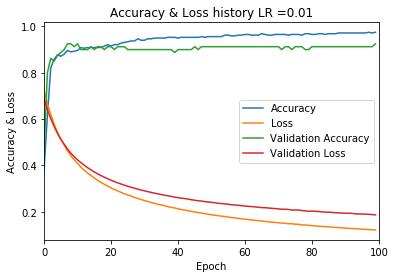

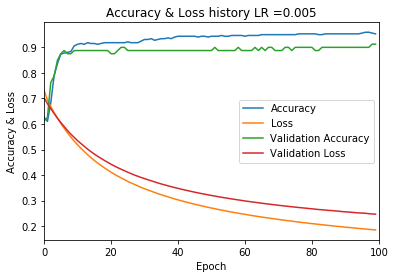

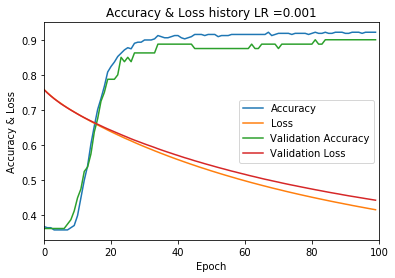

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn import metrics

'''
Code is inspired by an example in:
https://www.tensorflow.org/tutorials/keras/basic_classification
'''

LR = 0.001
EPOCHS = 100
def build_model(lr=LR, train_dataset=X):
    model = keras.Sequential([
        layers.Dense(1, activation=tf.nn.sigmoid, input_shape=[len(train_dataset.keys())])
      ])


    optimizer = tf.keras.optimizers.Adam(lr)

    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model



def plot_history(history, lr=LR):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.title(f"Accuracy & Loss history LR ={lr}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy & Loss')
    plt.xlim([0,EPOCHS])
    plt.plot(hist['epoch'], hist['acc'],
           label='Accuracy')
    plt.plot(hist['epoch'], hist['loss'],
           label = 'Loss')
    plt.plot(hist['epoch'], hist['val_acc'],
       label='Validation Accuracy')
    plt.plot(hist['epoch'], hist['val_loss'],
       label = 'Validation Loss')
    plt.legend()


# For evaluating acccuracy of the model given learning rate a I chose minimum of the last acchieved score during fitting part 
# From my choice of LRs - the best score was achieved with LR set to 0.05
lr_list = [0.1, 0.05, 0.01, 0.005, 0.001]
for lr in lr_list:
    model = build_model(lr)
    lr_history = model.fit(Xtrain, ytrain, epochs=EPOCHS, validation_split = 0.2, verbose=0)

    plot_history(lr_history, lr=lr)
    val_acc = lr_history.history['val_acc'][-1]
    print(f'Model with lr of ({lr}) (on validation data) has Accuracy of: {val_acc*100}%')
    





The lowest error was achived with learning rate value of 0.05 

In [0]:
lr_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Use the best model identified based on the validation data and run it on the test data.
    
# Compare the accuracy on the training data with the accuracy on the validation data and also accuracy on the test data. 



In [0]:
import numpy as np


lr = 0.05 # lr with the lowest error 

model = build_model(lr)

# Retrain model on best LR
lr_history = model.fit(Xtrain, ytrain, epochs=EPOCHS, validation_split = 0.2, verbose=0)

# Evaluate on test data
results = model.evaluate(Xtest, ytest, verbose=False)


acc = lr_history.history['acc'][-1]
acc_val = lr_history.history['val_acc'][-1]
acc_test = results[1]
print(f'Model with lr of ({lr}) (on TRAIN data) has accuracy for')
print(f'\t Train Data         {acc*100}%')
print(f'\t Validation Data    {acc_val*100}%')
print(f'\t Test Data          {acc_test*100}%')




Model with lr of (0.05) (on TRAIN data) has accuracy for
	 Train Data         99.37106966972351%
	 Validation Data    94.9999988079071%
	 Test Data          91.81286692619324%


# What features contribute the most to the price prediction?

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns



# Showing most impotant features, for the model by examining the strongness of the weights connected to the feature.
# This is suported by corellation table shown below 

weights = np.array([abs(x) for x in model.layers[0].get_weights()[0].flatten()])

print("Most important features:")

for i, index in enumerate(weights.argsort()[::-1]):
    print(f"\t{i+1}.\t {X.columns[index]}")




Most important features:
	1.	 worst concave points
	2.	 worst compactness
	3.	 mean smoothness
	4.	 mean concavity
	5.	 mean concave points
	6.	 radius error
	7.	 worst smoothness
	8.	 concave points error
	9.	 worst radius
	10.	 mean perimeter
	11.	 worst concavity
	12.	 worst area
	13.	 area error
	14.	 worst symmetry
	15.	 mean texture
	16.	 compactness error
	17.	 mean fractal dimension
	18.	 mean symmetry
	19.	 worst perimeter
	20.	 symmetry error
	21.	 smoothness error
	22.	 mean compactness
	23.	 mean radius
	24.	 mean area
	25.	 worst fractal dimension
	26.	 texture error
	27.	 perimeter error
	28.	 worst texture
	29.	 concavity error
	30.	 fractal dimension error
